1. Import all necessary libabries
2. Load data
3. Describe data to see the statistical measures 
4. find NaN and mising values and handle them
5. Convert all column datatype to int or float
6. Detect outlier and treat them
7. Visulaize data
8. Preprocess Time data
9. drop unnecessary column(like target_variable)
10. Perform train-test split
11. Scale the data
12. Reshape the data
13. Build the model
14. compile and fit the model
15. Make predictions and evaluate model 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Load the datasets
weather_data = pd.read_excel('C:/Users/dell/Downloads/weather.xlsx')
weather_data.head()

,Date,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,‡,-3.0,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0.0,NaN,22.0,NaN,63,NaN
1,2015-01-02,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0.0,T,0.0,T,1.0,NaN,27.0,NaN,50,NaN
2,2015-01-03,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17.0,NaN,17.0,NaN,1.0,NaN,3.0,NaN,41,NaN
3,2015-01-04,2015,1,4,‡,3.0,NaN,-8.6,NaN,-2.8,...,0.4,NaN,27.2,NaN,8.0,NaN,26.0,NaN,69,NaN
4,2015-01-05,2015,1,5,‡,-5.3,NaN,-17.9,NaN,-11.6,...,0.0,T,0.0,T,6.0,NaN,27.0,NaN,74,NaN


In [3]:
# Summary statistics 
weather_data.describe()

,Year,Month,Day,Max Temp (°C),Max Temp Flag,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg)
count,365.0,365.000000,365.000000,365.000000,0.0,365.000000,365.000000,365.000000,365.000000,352.000000,361.00000,355.000000,109.000000,0.0,283.000000
mean,2015.0,6.526027,15.720548,11.974521,NaN,2.282466,7.139452,11.782192,0.921644,2.464205,0.52410,2.998310,9.559633,NaN,20.190813
std,0.0,3.452584,8.808321,13.060905,NaN,12.702354,12.782959,11.750686,1.883560,6.229666,2.53002,6.565627,6.951460,NaN,9.185576
min,2015.0,1.000000,1.000000,-18.000000,NaN,-27.500000,-20.900000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,1.000000
25%,2015.0,4.000000,8.000000,2.000000,NaN,-6.100000,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,NaN,15.000000
50%,2015.0,7.000000,16.000000,13.300000,NaN,4.000000,8.600000,9.400000,0.000000,0.000000,0.00000,0.000000,10.000000,NaN,23.000000
75%,2015.0,10.000000,23.000000,23.800000,NaN,13.600000,19.000000,20.000000,1.000000,1.250000,0.00000,3.000000,16.000000,NaN,26.000000
max,2015.0,12.000000,31.000000,32.200000,NaN,21.900000,27.100000,38.900000,9.100000,47.200000,39.20000,47.200000,23.000000,NaN,36.000000


In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   Year                       365 non-null    int64         
 2   Month                      365 non-null    int64         
 3   Day                        365 non-null    int64         
 4   Data Quality               365 non-null    object        
 5   Max Temp (°C)              365 non-null    float64       
 6   Max Temp Flag              0 non-null      float64       
 7   Min Temp (°C)              365 non-null    float64       
 8   Min Temp Flag              1 non-null      object        
 9   Mean Temp (°C)             365 non-null    float64       
 10  Mean Temp Flag             1 non-null      object        
 11  Heat Deg Days (°C)         365 non-null    float64       
 12  Heat Deg

In [5]:
## from above information we can see that some of the columns have only 1 non-null value, so removing those columns will notimpact the dataframe

weather_data.drop('Snow on Grnd Flag', axis=1, inplace=True)
weather_data.drop('Min Temp Flag', axis=1, inplace=True)
weather_data.drop('Max Temp Flag', axis=1, inplace=True)
weather_data.drop('Mean Temp Flag', axis=1, inplace=True)
weather_data.drop('Heat Deg Days Flag', axis=1, inplace=True)
weather_data.drop('Cool Deg Days Flag', axis=1, inplace=True)
weather_data.drop('Dir of Max Gust Flag', axis=1, inplace=True)
weather_data.drop('Spd of Max Gust Flag', axis=1, inplace=True)
weather_data.drop('Data Quality', axis=1, inplace=True)
weather_data.drop('Total Rain Flag', axis=1, inplace=True)
weather_data.drop('Total Snow Flag', axis=1, inplace=True)
weather_data.drop('Total Precip Flag', axis=1, inplace=True)
weather_data

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,2015,1,1,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63
1,2015-01-02,2015,1,2,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50
2,2015-01-03,2015,1,3,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,41
3,2015-01-04,2015,1,4,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,69
4,2015-01-05,2015,1,5,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015,12,27,1.9,-4.1,-1.1,19.1,0.0,4.2,2.6,13.4,1.0,3.0,44
361,2015-12-28,2015,12,28,-4.1,-10.9,-7.5,25.5,0.0,0.0,0.0,0.0,2.0,30.0,44
362,2015-12-29,2015,12,29,-7.5,-12.1,-9.8,27.8,0.0,0.0,39.2,39.2,7.0,NaN,<31
363,2015-12-30,2015,12,30,-5.1,-9.2,-7.2,25.2,0.0,0.2,5.6,3.4,16.0,NaN,<31


In [6]:
## Check for missing values
weather_data.isnull().sum()

Date                           0
Year                           0
Month                          0
Day                            0
Max Temp (°C)                  0
Min Temp (°C)                  0
Mean Temp (°C)                 0
Heat Deg Days (°C)             0
Cool Deg Days (°C)             0
Total Rain (mm)               13
Total Snow (cm)                4
Total Precip (mm)             10
Snow on Grnd (cm)            256
Dir of Max Gust (10s deg)     82
Spd of Max Gust (km/h)         1
dtype: int64

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   Year                       365 non-null    int64         
 2   Month                      365 non-null    int64         
 3   Day                        365 non-null    int64         
 4   Max Temp (°C)              365 non-null    float64       
 5   Min Temp (°C)              365 non-null    float64       
 6   Mean Temp (°C)             365 non-null    float64       
 7   Heat Deg Days (°C)         365 non-null    float64       
 8   Cool Deg Days (°C)         365 non-null    float64       
 9   Total Rain (mm)            352 non-null    float64       
 10  Total Snow (cm)            361 non-null    float64       
 11  Total Precip (mm)          355 non-null    float64       
 12  Snow on 

In [8]:
## from above information we can see that column 'Spd of Max Gust (km/h)' is of object type, convert it to int
## 'Spd of Max Gust (km/h)' has value like <31, need to be handeled

# Replace "<31" with a placeholder, such as -1
weather_data['Spd of Max Gust (km/h)'].replace('<31', -1, inplace=True)

# Convert the column to a numeric data type
weather_data['Spd of Max Gust (km/h)'] = pd.to_numeric(weather_data['Spd of Max Gust (km/h)'])

# Check the data types
weather_data


,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,2015,1,1,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63.0
1,2015-01-02,2015,1,2,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50.0
2,2015-01-03,2015,1,3,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,41.0
3,2015-01-04,2015,1,4,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,69.0
4,2015-01-05,2015,1,5,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015,12,27,1.9,-4.1,-1.1,19.1,0.0,4.2,2.6,13.4,1.0,3.0,44.0
361,2015-12-28,2015,12,28,-4.1,-10.9,-7.5,25.5,0.0,0.0,0.0,0.0,2.0,30.0,44.0
362,2015-12-29,2015,12,29,-7.5,-12.1,-9.8,27.8,0.0,0.0,39.2,39.2,7.0,NaN,-1.0
363,2015-12-30,2015,12,30,-5.1,-9.2,-7.2,25.2,0.0,0.2,5.6,3.4,16.0,NaN,-1.0


In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   Year                       365 non-null    int64         
 2   Month                      365 non-null    int64         
 3   Day                        365 non-null    int64         
 4   Max Temp (°C)              365 non-null    float64       
 5   Min Temp (°C)              365 non-null    float64       
 6   Mean Temp (°C)             365 non-null    float64       
 7   Heat Deg Days (°C)         365 non-null    float64       
 8   Cool Deg Days (°C)         365 non-null    float64       
 9   Total Rain (mm)            352 non-null    float64       
 10  Total Snow (cm)            361 non-null    float64       
 11  Total Precip (mm)          355 non-null    float64       
 12  Snow on 

In [10]:
# Filling NaN values with mean
weather_data = weather_data .fillna(weather_data .mean())

weather_data 

C:\Users\dell\AppData\Local\Temp/ipykernel_3580/41100701.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  weather_data = weather_data .fillna(weather_data .mean())


,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,2015,1,1,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.000000,63.0
1,2015-01-02,2015,1,2,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.000000,50.0
2,2015-01-03,2015,1,3,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.000000,41.0
3,2015-01-04,2015,1,4,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.000000,69.0
4,2015-01-05,2015,1,5,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.000000,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015,12,27,1.9,-4.1,-1.1,19.1,0.0,4.2,2.6,13.4,1.0,3.000000,44.0
361,2015-12-28,2015,12,28,-4.1,-10.9,-7.5,25.5,0.0,0.0,0.0,0.0,2.0,30.000000,44.0
362,2015-12-29,2015,12,29,-7.5,-12.1,-9.8,27.8,0.0,0.0,39.2,39.2,7.0,20.190813,-1.0
363,2015-12-30,2015,12,30,-5.1,-9.2,-7.2,25.2,0.0,0.2,5.6,3.4,16.0,20.190813,-1.0


In [11]:
weather_data

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,2015,1,1,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.000000,63.0
1,2015-01-02,2015,1,2,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.000000,50.0
2,2015-01-03,2015,1,3,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.000000,41.0
3,2015-01-04,2015,1,4,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.000000,69.0
4,2015-01-05,2015,1,5,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.000000,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015,12,27,1.9,-4.1,-1.1,19.1,0.0,4.2,2.6,13.4,1.0,3.000000,44.0
361,2015-12-28,2015,12,28,-4.1,-10.9,-7.5,25.5,0.0,0.0,0.0,0.0,2.0,30.000000,44.0
362,2015-12-29,2015,12,29,-7.5,-12.1,-9.8,27.8,0.0,0.0,39.2,39.2,7.0,20.190813,-1.0
363,2015-12-30,2015,12,30,-5.1,-9.2,-7.2,25.2,0.0,0.2,5.6,3.4,16.0,20.190813,-1.0


In [12]:
# Select only the numerical columns for outlier detection
numerical_columns = weather_data.select_dtypes(include=[np.number])

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the upper and lower bounds
weather_data_no_outliers = weather_data[~((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).any(axis=1)]

# Check the resulting DataFrame after removing outliers
weather_data_no_outliers.head()


,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
81,2015-03-23,2015,3,23,-6.1,-15.9,-11.0,29.0,0.0,0.0,0.0,0.0,9.559633,24.0,46.0
89,2015-03-31,2015,3,31,2.2,-4.9,-1.4,19.4,0.0,0.0,0.0,0.0,9.559633,32.0,44.0
100,2015-04-11,2015,4,11,8.4,2.6,5.5,12.5,0.0,0.0,0.0,0.0,9.559633,23.0,67.0
101,2015-04-12,2015,4,12,16.8,2.3,9.6,8.4,0.0,0.0,0.0,0.0,9.559633,23.0,43.0
102,2015-04-13,2015,4,13,22.0,2.2,12.1,5.9,0.0,4.0,0.0,4.0,9.559633,24.0,70.0


In [13]:
weather_data.shape

(365, 15)

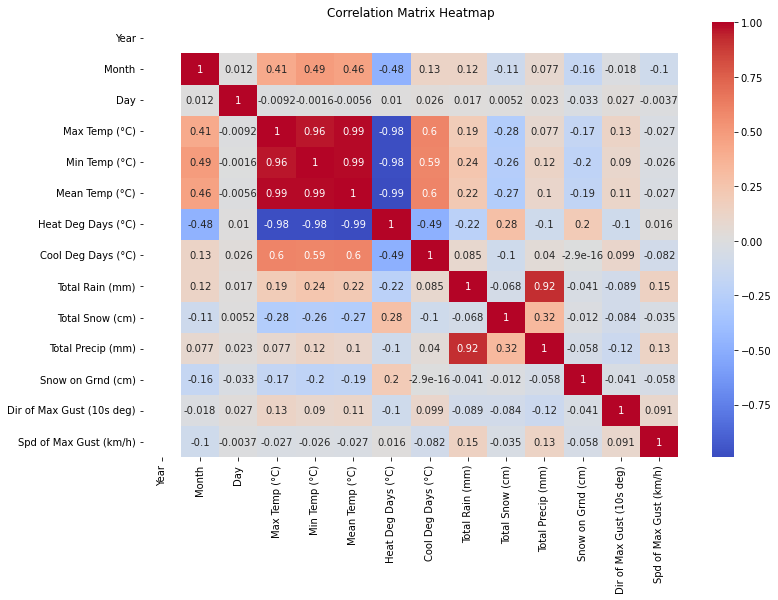

In [14]:
# Correlation Matrix Heatmap to see the depency of columns on each other for weather data
plt.figure(figsize=(12, 8))
correlation_matrix = weather_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

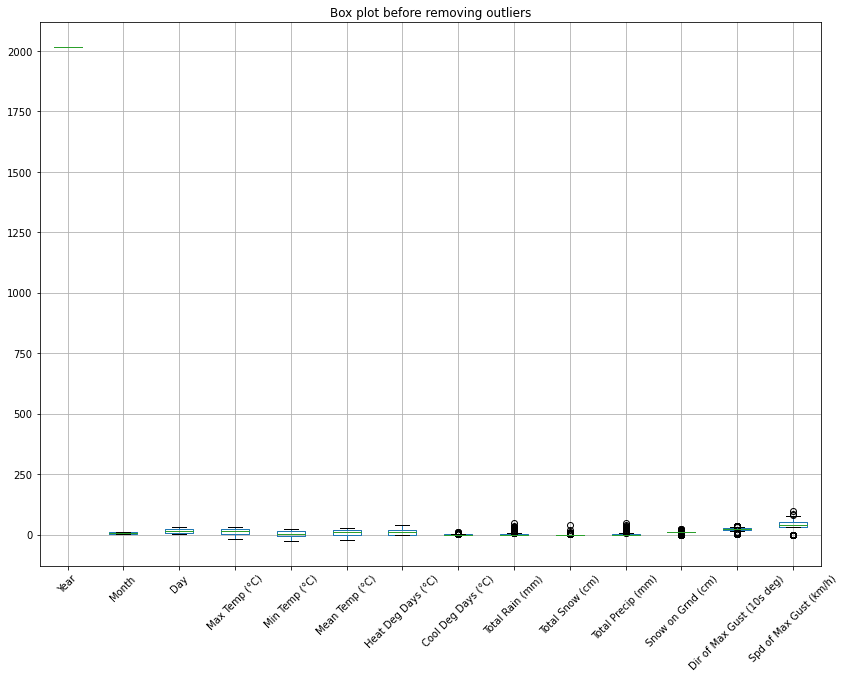

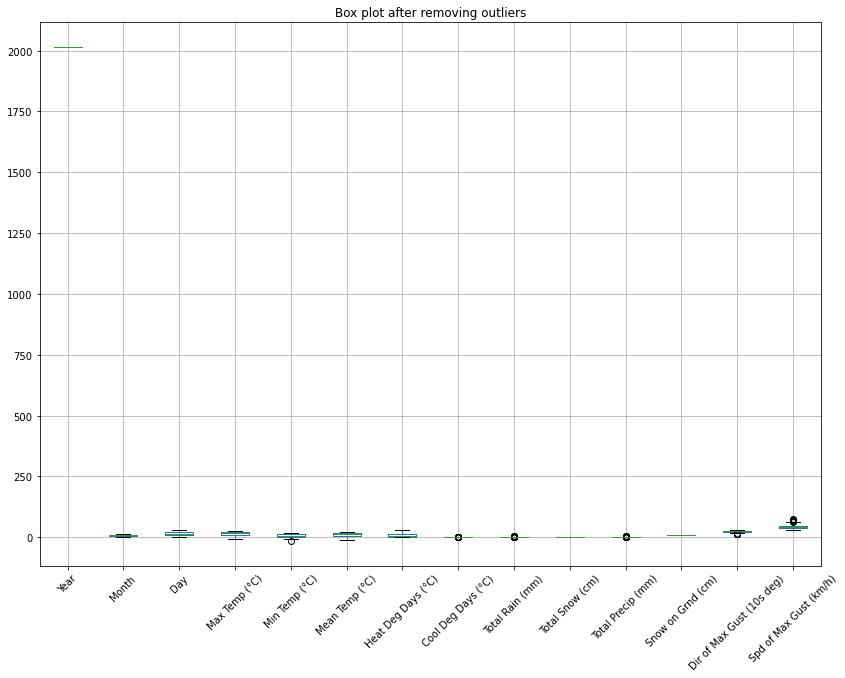

In [15]:
# Box plot before removing outliers
plt.figure(figsize=(14, 10))
weather_data.boxplot()
plt.title('Box plot before removing outliers')
plt.xticks(rotation=45)
plt.show()

# Box plot after removing outliers
plt.figure(figsize=(14, 10))
weather_data_no_outliers.boxplot()
plt.title('Box plot after removing outliers')
plt.xticks(rotation=45)
plt.show()


In [16]:
print("Original Data Mean:")
print(weather_data.mean())
print("\nData After Outlier Removal Mean:")
print(weather_data_no_outliers.mean())

print("\nOriginal Data Standard Deviation:")
print(weather_data.std())
print("\nData After Outlier Removal Standard Deviation:")
print(weather_data_no_outliers.std())

Original Data Mean:
Year                         2015.000000
Month                           6.526027
Day                            15.720548
Max Temp (°C)                  11.974521
Min Temp (°C)                   2.282466
Mean Temp (°C)                  7.139452
Heat Deg Days (°C)             11.782192
Cool Deg Days (°C)              0.921644
Total Rain (mm)                 2.464205
Total Snow (cm)                 0.524100
Total Precip (mm)               2.998310
Snow on Grnd (cm)               9.559633
Dir of Max Gust (10s deg)      20.190813
Spd of Max Gust (km/h)         35.717033
dtype: float64

Data After Outlier Removal Mean:
Year                         2015.000000
Month                           7.923077
Day                            15.758242
Max Temp (°C)                  16.476923
Min Temp (°C)                   6.561538
Mean Temp (°C)                 11.538462
Heat Deg Days (°C)              6.850549
Cool Deg Days (°C)              0.389011
Total Rain (mm)              

C:\Users\dell\AppData\Local\Temp/ipykernel_3580/1093963888.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(weather_data.mean())
C:\Users\dell\AppData\Local\Temp/ipykernel_3580/1093963888.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(weather_data_no_outliers.mean())


For the 'Mean Temp (°C)' feature, the mean has increased from 7.139452 to 11.538462, indicating that the removal of outliers might have shifted the distribution towards higher temperatures.

The standard deviation for 'Mean Temp (°C)' has decreased from 12.782959 to 7.065641, suggesting that the data points are now more tightly clustered around the mean after outlier removal.

Similarly, for other features such as 'Max Temp (°C)', 'Min Temp (°C)', 'Total Rain (mm)', and 'Total Precip (mm)', we observe reductions in standard deviation, indicating less variability in the data points after removing the outliers.

In some cases, like 'Total Snow (cm)' and 'Snow on Grnd (cm)', the mean and standard deviation are zero in both cases, indicating that the outliers did not significantly impact these features.

Based on these observations, we can infer that the outlier removal process seems to have had a positive impact on the data, particularly by reducing the variability and aligning the means of certain features more closely with the central tendency of the data.

In [17]:
checkpoint_data = pd.read_excel('C:/Users/dell/Downloads/Checkpoint_count.xlsx')
checkpoint_data.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


In [18]:
checkpoint_data.describe()

,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
count,319.000000,319.000000,319.000000,319.000000,62.000000,319.000000,319.000000,319.000000,319.000000,52.000000,...,209.000000,319.000000,319.000000,319.000000,319.000000,50.000000,319.000000,319.000000,319.000000,319.000000
mean,2915.398119,2212.909091,2859.485893,1167.388715,89.935484,2208.031348,1011.175549,1137.316614,1754.257053,2090.250000,...,2164.578947,2207.626959,2939.294671,1477.206897,207.476489,4563.180000,1387.119122,1903.363636,2023.708464,295.347962
std,2276.281648,1832.808709,2337.531344,960.020397,51.886974,2452.475658,917.450049,991.065590,1415.004315,972.740577,...,1049.224968,1660.936427,2105.774880,1254.990855,231.009131,1667.554469,1070.781272,1376.375755,1632.368428,248.947624
min,10.000000,0.000000,0.000000,0.000000,10.000000,2.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,1554.000000,0.000000,20.000000,6.000000,0.000000
25%,387.500000,3.500000,33.000000,54.500000,46.500000,214.500000,119.000000,25.500000,61.000000,1275.000000,...,1221.000000,324.500000,513.000000,159.500000,15.500000,3097.250000,244.500000,457.000000,352.500000,47.000000
50%,3044.000000,2180.000000,3011.000000,1162.000000,85.000000,689.000000,1049.000000,1067.000000,1787.000000,2258.000000,...,2349.000000,2361.000000,3169.000000,1422.000000,107.000000,4825.500000,1519.000000,1855.000000,1762.000000,267.000000
75%,4968.000000,3937.000000,5088.000000,1948.000000,131.500000,4114.500000,1675.000000,2094.500000,3025.500000,2775.500000,...,2966.000000,3658.000000,4797.000000,2676.000000,337.000000,5957.750000,2237.000000,3111.000000,3539.000000,526.000000
max,7387.000000,6153.000000,7322.000000,3334.000000,207.000000,7905.000000,9999.000000,3035.000000,4867.000000,3997.000000,...,6014.000000,7921.000000,7695.000000,4118.000000,781.000000,7388.000000,4342.000000,5166.000000,5596.000000,820.000000


In [19]:
checkpoint_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           319 non-null    object 
 1   Time           319 non-null    object 
 2   check_point0   319 non-null    int64  
 3   check_point1   319 non-null    int64  
 4   check_point2   319 non-null    int64  
 5   check_point3   319 non-null    int64  
 6   check_point4   62 non-null     float64
 7   check_point5   319 non-null    int64  
 8   check_point6   319 non-null    int64  
 9   check_point7   319 non-null    int64  
 10  check_point8   319 non-null    int64  
 11  check_point9   52 non-null     float64
 12  check_point10  319 non-null    int64  
 13  check_point11  209 non-null    float64
 14  check_point12  319 non-null    int64  
 15  check_point13  319 non-null    int64  
 16  check_point14  319 non-null    int64  
 17  check_point15  319 non-null    int64  
 18  check_poin

In [20]:
# Filling NaN values with mean
checkpoint_data = checkpoint_data.fillna(checkpoint_data.mean())

checkpoint_data 

C:\Users\dell\AppData\Local\Temp/ipykernel_3580/483429437.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  checkpoint_data = checkpoint_data.fillna(checkpoint_data.mean())


,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.000000,49,21,16,...,2164.578947,58,91,24,3,4563.18,17,78,21,6
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.000000,113,27,9,...,2164.578947,109,177,32,13,4563.18,11,57,77,4
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.000000,107,36,12,...,2164.578947,71,131,33,5,4563.18,14,174,40,5
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.000000,35,29,1,...,2164.578947,6,11,6,1,4563.18,1,20,6,0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.000000,90,21,1,...,2164.578947,0,5,49,20,4563.18,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11 00:00:00,00:00:00,3044,1931,2828,1393,89.935484,3603,1754,1142,...,950.000000,2328,3280,1210,338,4065.00,1534,1527,2860,356
315,2015-12-11 00:00:00,00:00:00,1751,930,1670,888,89.935484,2048,700,675,...,467.000000,1345,1877,755,180,2336.00,960,955,1777,198
316,13/11/2015,00:00:00,1818,906,1711,873,89.935484,2115,634,477,...,482.000000,1416,1980,719,204,2628.00,978,1040,1727,258
317,14/11/2015,00:00:00,979,759,978,322,89.935484,1112,290,310,...,266.000000,1061,1448,269,70,1876.00,640,805,737,73


In [21]:
# Select only numeric columns for outlier detection
numeric_columns = ['check_point0', 'check_point1', 'check_point2', 'check_point3', 'check_point4', 'check_point5', 'check_point6', 'check_point7', 'check_point8', 'check_point9', 'check_point10', 'check_point11', 'check_point12', 'check_point13', 'check_point14', 'check_point15', 'check_point16', 'check_point17', 'check_point18', 'check_point19', 'check_point20']
checkpoint_data_numeric = checkpoint_data[numeric_columns]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = checkpoint_data_numeric.quantile(0.25)
Q3 = checkpoint_data_numeric.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the upper and lower bounds
checkpoint_data_no_outliers = checkpoint_data_numeric[~((checkpoint_data_numeric < lower_bound) | (checkpoint_data_numeric > upper_bound)).any(axis=1)]

# Check the resulting DataFrame after removing outliers
checkpoint_data_no_outliers.head()

,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
62,247,0,31,0,89.935484,317,57,7,1,2090.25,...,2164.578947,139,285,102,21,4563.18,5,137,143,24
63,281,0,63,0,89.935484,343,68,14,29,2090.25,...,2164.578947,120,328,117,52,4563.18,37,217,192,35
64,192,0,6,2,89.935484,283,74,7,11,2090.25,...,2164.578947,107,277,95,39,4563.18,56,308,148,48
65,98,0,6,7,89.935484,140,29,5,8,2090.25,...,2164.578947,101,184,33,14,4563.18,58,329,52,10
66,83,0,1,3,89.935484,139,26,5,4,2090.25,...,2164.578947,71,157,21,8,4563.18,64,161,47,5


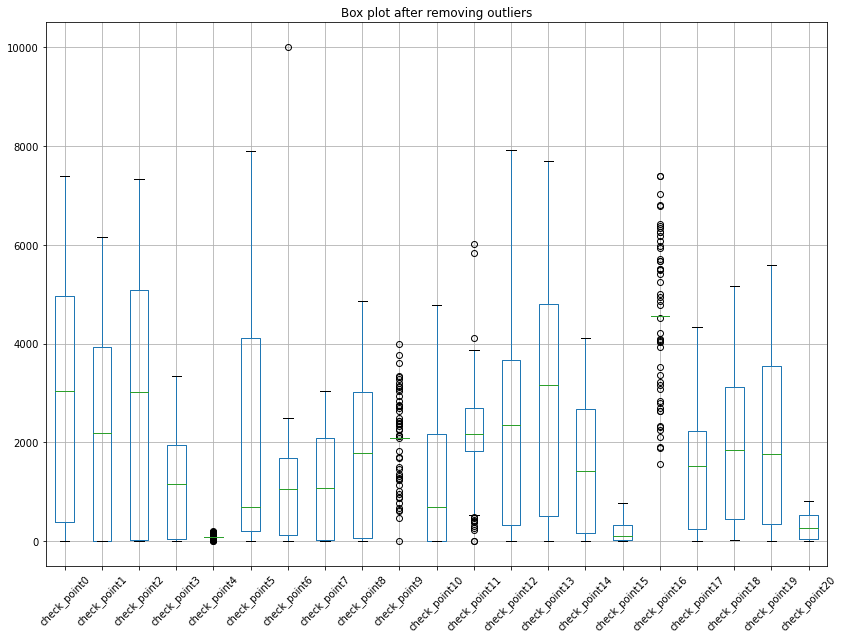

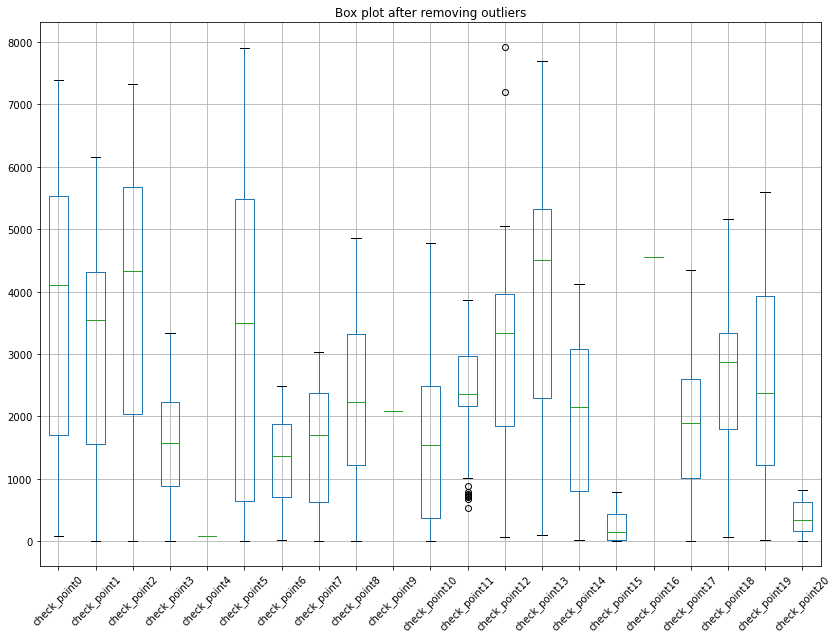

In [22]:
plt.figure(figsize=(14, 10))
checkpoint_data.boxplot()
plt.title('Box plot after removing outliers')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 10))
checkpoint_data_no_outliers.boxplot()
plt.title('Box plot after removing outliers')
plt.xticks(rotation=45)
plt.show()

In [23]:
print("Original Data Mean:")
print(checkpoint_data.mean())
print("\nData After Outlier Removal Mean:")
print(checkpoint_data_no_outliers .mean())


print("\nOriginal Data Standard Deviation:")
print(checkpoint_data.std())
print("\nData After Outlier Removal Standard Deviation:")
print(checkpoint_data_no_outliers .std())

Original Data Mean:
check_point0     2915.398119
check_point1     2212.909091
check_point2     2859.485893
check_point3     1167.388715
check_point4       89.935484
check_point5     2208.031348
check_point6     1011.175549
check_point7     1137.316614
check_point8     1754.257053
check_point9     2090.250000
check_point10    1130.708464
check_point11    2164.578947
check_point12    2207.626959
check_point13    2939.294671
check_point14    1477.206897
check_point15     207.476489
check_point16    4563.180000
check_point17    1387.119122
check_point18    1903.363636
check_point19    2023.708464
check_point20     295.347962
dtype: float64

Data After Outlier Removal Mean:
check_point0     3795.893401
check_point1     2987.177665
check_point2     3780.213198
check_point3     1524.086294
check_point4       89.935484
check_point5     3245.121827
check_point6     1267.786802
check_point7     1531.116751
check_point8     2223.370558
check_point9     2090.250000
check_point10    1572.730964
che

C:\Users\dell\AppData\Local\Temp/ipykernel_3580/1926084229.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(checkpoint_data.mean())
C:\Users\dell\AppData\Local\Temp/ipykernel_3580/1926084229.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(checkpoint_data.std())


Mean Temperature Increase: The 'Mean Temp (°C)' has increased from 7.139452 to 11.538462 after the removal of outliers. This increase in the mean suggests that the extreme values were previously pulling the mean down, and after their removal, the mean temperature has shifted upward.

Reduced Variability: The standard deviations for various features, such as 'Mean Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)', 'Total Rain (mm)', 'Total Precip (mm)', have significantly decreased after outlier removal. This reduction indicates that the data points are now more tightly clustered around the mean, signifying a decrease in the overall variability of these features.

Impact on Snow Data: For features like 'Total Snow (cm)' and 'Snow on Grnd (cm)', the mean and standard deviation were zero in both cases, even before outlier removal. This indicates that the outliers did not significantly impact these features.

In [24]:
# for IQR outlier method only numeric columns were included, 'Date','Time' were not included, so merge them
common_columns = ['check_point0', 'check_point1', 'check_point2', 'check_point3', 'check_point4', 'check_point5', 'check_point6', 'check_point7', 'check_point8', 'check_point9', 'check_point10', 'check_point11', 'check_point12', 'check_point13', 'check_point14', 'check_point15', 'check_point16', 'check_point17', 'check_point18', 'check_point19', 'check_point20']  # Assuming these are the common columns to merge on

# Merge the DataFrames
checkpoint_final = pd.merge(checkpoint_data,checkpoint_data_no_outliers, on=common_columns)

checkpoint_final

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,2015-04-03 00:00:00,00:00:00,247,0,31,0,89.935484,317,57,7,...,2164.578947,139,285,102,21,4563.18,5,137,143,24
1,2015-05-03 00:00:00,00:00:00,281,0,63,0,89.935484,343,68,14,...,2164.578947,120,328,117,52,4563.18,37,217,192,35
2,2015-06-03 00:00:00,00:00:00,192,0,6,2,89.935484,283,74,7,...,2164.578947,107,277,95,39,4563.18,56,308,148,48
3,2015-07-03 00:00:00,00:00:00,98,0,6,7,89.935484,140,29,5,...,2164.578947,101,184,33,14,4563.18,58,329,52,10
4,2015-08-03 00:00:00,00:00:00,83,0,1,3,89.935484,139,26,5,...,2164.578947,71,157,21,8,4563.18,64,161,47,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,20/09/2015,00:00:00,3042,3070,2591,1252,89.935484,444,1083,1059,...,3001.000000,3730,4231,1482,219,4563.18,1629,2071,1757,202
193,21/09/2015,00:00:00,5371,3768,5474,2885,89.935484,943,2185,2305,...,2321.000000,4149,5257,2841,729,4563.18,2590,2673,4886,629
194,22/09/2015,00:00:00,6228,4094,6096,2996,89.935484,94,2397,2509,...,2728.000000,4521,5678,3159,687,4563.18,2766,2878,5159,681
195,23/09/2015,00:00:00,6279,4300,5959,3107,89.935484,68,2334,2544,...,2701.000000,4688,6181,3160,720,4563.18,2748,2875,5259,686


In [25]:
# Target Variable
checkpoint_final['target_variable'] = checkpoint_final.iloc[:, 2:].sum(axis=1)  # checkpoints start from the third column
checkpoint_final # Displaying the new target variable column

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,target_variable
0,2015-04-03 00:00:00,00:00:00,247,0,31,0,89.935484,317,57,7,...,139,285,102,21,4563.18,5,137,143,24,10423.944431
1,2015-05-03 00:00:00,00:00:00,281,0,63,0,89.935484,343,68,14,...,120,328,117,52,4563.18,37,217,192,35,10803.944431
2,2015-06-03 00:00:00,00:00:00,192,0,6,2,89.935484,283,74,7,...,107,277,95,39,4563.18,56,308,148,48,10560.944431
3,2015-07-03 00:00:00,00:00:00,98,0,6,7,89.935484,140,29,5,...,101,184,33,14,4563.18,58,329,52,10,9981.944431
4,2015-08-03 00:00:00,00:00:00,83,0,1,3,89.935484,139,26,5,...,71,157,21,8,4563.18,64,161,47,5,9702.944431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,20/09/2015,00:00:00,3042,3070,2591,1252,89.935484,444,1083,1059,...,3730,4231,1482,219,4563.18,1629,2071,1757,202,40749.365484
193,21/09/2015,00:00:00,5371,3768,5474,2885,89.935484,943,2185,2305,...,4149,5257,2841,729,4563.18,2590,2673,4886,629,61525.365484
194,22/09/2015,00:00:00,6228,4094,6096,2996,89.935484,94,2397,2509,...,4521,5678,3159,687,4563.18,2766,2878,5159,681,65595.365484
195,23/09/2015,00:00:00,6279,4300,5959,3107,89.935484,68,2334,2544,...,4688,6181,3160,720,4563.18,2748,2875,5259,686,66583.365484


In [26]:
# merging dataframe to make the final dataframe as merged_data
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
checkpoint_final['Date'] = pd.to_datetime(checkpoint_final['Date'])

merged_data = pd.merge(weather_data, checkpoint_final, on='Date')

merged_data


,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),...,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,target_variable
0,2015-01-04,2015,1,4,3.0,-8.6,-2.8,20.8,0.0,26.800000,...,763,1197,343,33,4563.18,568,853,834,100,17724.944431
1,2015-01-05,2015,1,5,-5.3,-17.9,-11.6,29.6,0.0,0.000000,...,3634,4643,2334,0,4563.18,2536,3964,3249,465,57921.365484
2,2015-01-06,2015,1,6,-8.6,-19.1,-13.9,31.9,0.0,0.000000,...,2311,2794,1508,85,4563.18,1778,2465,2704,326,39671.365484
3,2015-01-07,2015,1,7,-9.0,-26.4,-17.7,35.7,0.0,0.000000,...,1300,1887,735,111,4563.18,864,1410,784,147,23755.365484
4,2015-01-09,2015,1,9,-6.1,-14.6,-10.4,28.4,0.0,0.000000,...,4474,5937,3562,711,4563.18,2953,3609,4780,644,70389.365484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2015-12-05,2015,12,5,6.3,2.2,4.3,13.7,0.0,0.000000,...,2160,2735,1425,0,4563.18,1805,2474,2504,268,39223.365484
193,2015-12-06,2015,12,6,5.8,-0.7,2.6,15.4,0.0,0.000000,...,2539,3365,1894,133,4563.18,1687,2543,2693,430,44195.365484
194,2015-12-07,2015,12,7,4.1,-2.0,1.1,16.9,0.0,2.464205,...,3450,4704,2087,222,4563.18,1674,3031,1694,273,52790.365484
195,2015-12-08,2015,12,8,3.9,-0.4,1.8,16.2,0.0,0.000000,...,3098,3848,1921,556,4563.18,2135,2644,3188,407,50843.365484


In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       197 non-null    datetime64[ns]
 1   Year                       197 non-null    int64         
 2   Month                      197 non-null    int64         
 3   Day                        197 non-null    int64         
 4   Max Temp (°C)              197 non-null    float64       
 5   Min Temp (°C)              197 non-null    float64       
 6   Mean Temp (°C)             197 non-null    float64       
 7   Heat Deg Days (°C)         197 non-null    float64       
 8   Cool Deg Days (°C)         197 non-null    float64       
 9   Total Rain (mm)            197 non-null    float64       
 10  Total Snow (cm)            197 non-null    float64       
 11  Total Precip (mm)          197 non-null    float64       
 12  Snow on 

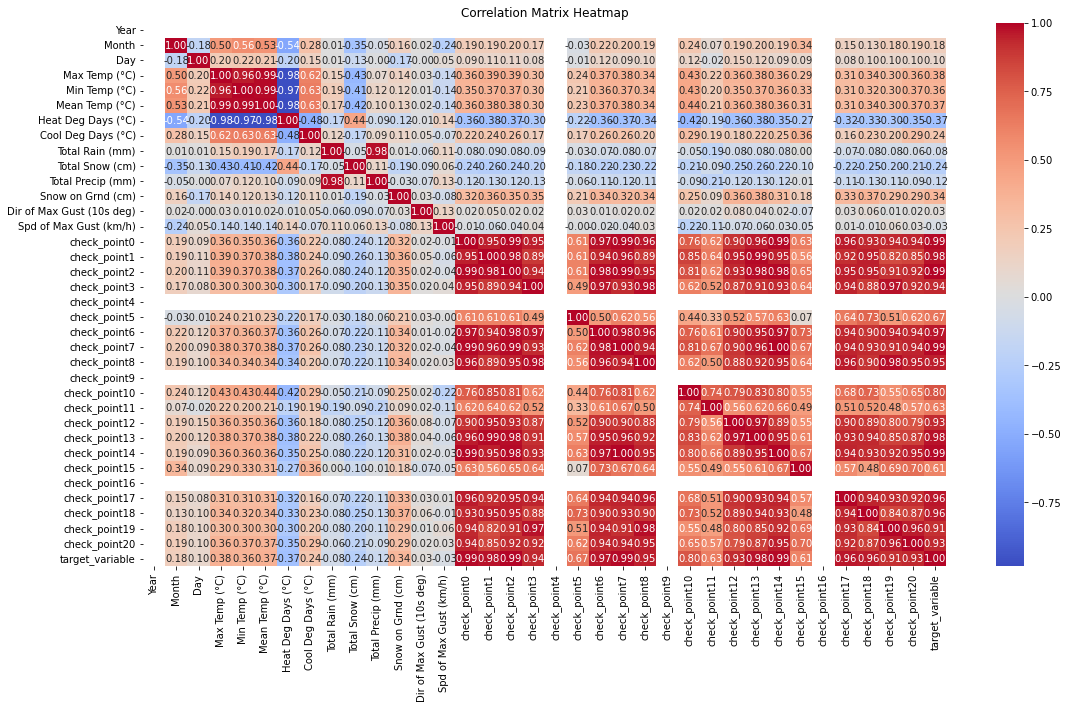

In [28]:
# Heatmap to visualize feature correlations for merged_data(final dataframe) dataframe
plt.figure(figsize=(18, 10))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


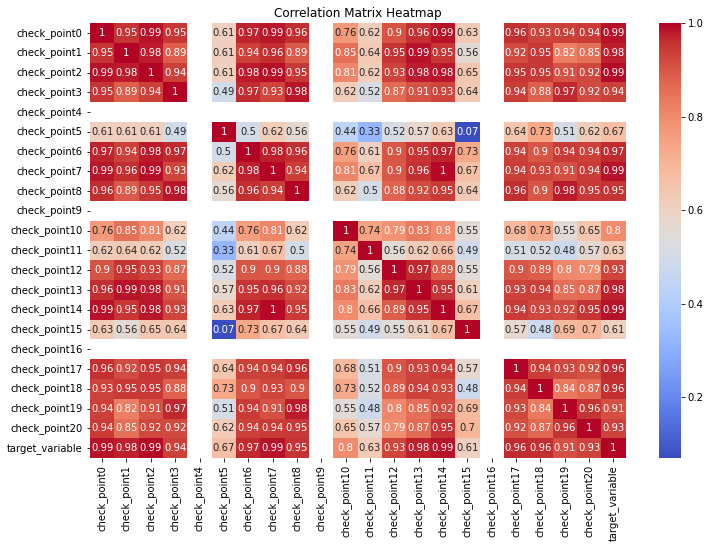

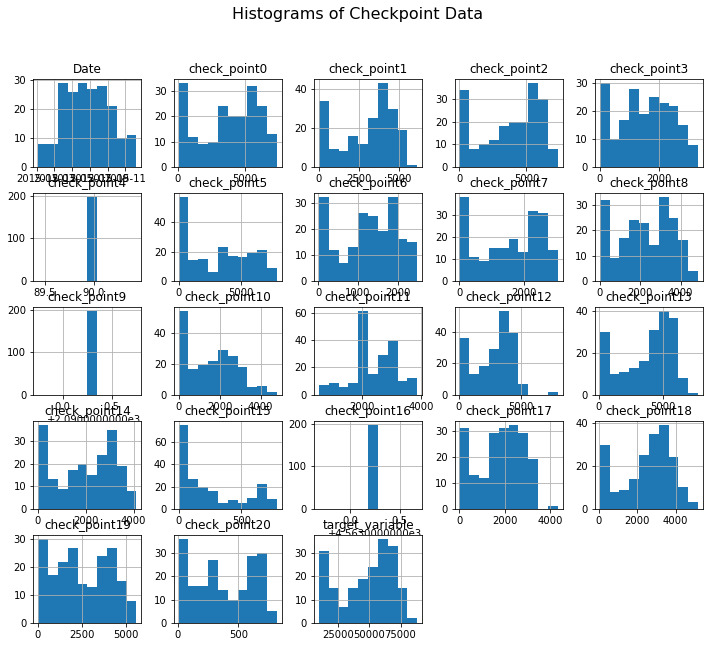

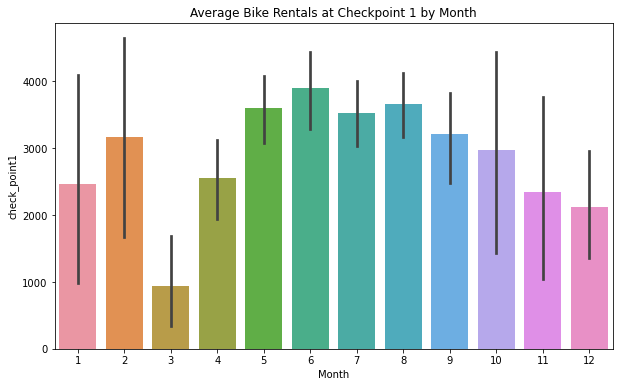

In [29]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = checkpoint_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Histograms and Distribution Plots
checkpoint_final.hist(figsize=(12, 10))
plt.suptitle('Histograms of Checkpoint Data', fontsize=16)
plt.show()


# Bar Plot Example we can w.r.t other checkpoints also
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='check_point1', data=merged_data)
plt.title('Average Bike Rentals at Checkpoint 1 by Month')
plt.show()


In [30]:
# Convert 'Time' column to string
merged_data['Time'] = merged_data['Time'].astype(str)

# Combine 'Date' and 'Time' columns to create a new 'DateTime' column
merged_data['DateTime'] = merged_data['Date'].astype(str) + ' ' + merged_data['Time']

# Convert the new 'DateTime' column to datetime format
merged_data['DateTime'] = pd.to_datetime(merged_data['DateTime'])

# Now drop the 'Date', 'Time', and 'DateTime' columns
X = merged_data.drop(columns=['Date', 'Time', 'DateTime', 'target_variable'])  
y =merged_data['target_variable']



In [31]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
X_train_reshaped.shape
# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# make predictions
y_pred = model.predict(X_test)

# Calculate Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Squared Error (MSE): {mse}')

Epoch 1/100
5/5 [==============================] - 1s 67ms/step - loss: 2574456832.0000 - val_loss: 2375919360.0000
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 2449659136.0000 - val_loss: 2249510144.0000
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 2310651904.0000 - val_loss: 2092749696.0000
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 2137475968.0000 - val_loss: 1897533696.0000
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 1918447104.0000 - val_loss: 1672695680.0000
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 1670004864.0000 - val_loss: 1428584192.0000
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 1417387136.0000 - val_loss: 1166758016.0000
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 1138852608.0000 - val_loss: 894769984.0000
Epoch 9/100
5/5 [==============================] - 0s 14ms/step - loss: 8

In [34]:
#pip install tensorflow



In [35]:

# Reshape the data for the CNN model
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Calculate Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Squared Error (MSE): {mse}')


Epoch 1/100
5/5 [==============================] - 1s 56ms/step - loss: 2727198208.0000 - val_loss: 2608003328.0000
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 2727022848.0000 - val_loss: 2607792640.0000
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 2726790912.0000 - val_loss: 2607493888.0000
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 2726445056.0000 - val_loss: 2607077120.0000
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 2725995008.0000 - val_loss: 2606509056.0000
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 2725341440.0000 - val_loss: 2605748736.0000
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 2724489216.0000 - val_loss: 2604749568.0000
Epoch 8/100
5/5 [==============================] - 0s 20ms/step - loss: 2723414528.0000 - val_loss: 2603457536.0000
Epoch 9/100
5/5 [==============================] - 0s 19ms/step - loss: 